In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpyp
import plotly.express as px
import seaborn as sb

In [44]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

In [45]:
df=pd.read_csv('../data/bank.csv', sep=';').drop_duplicates()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### Data Analytic

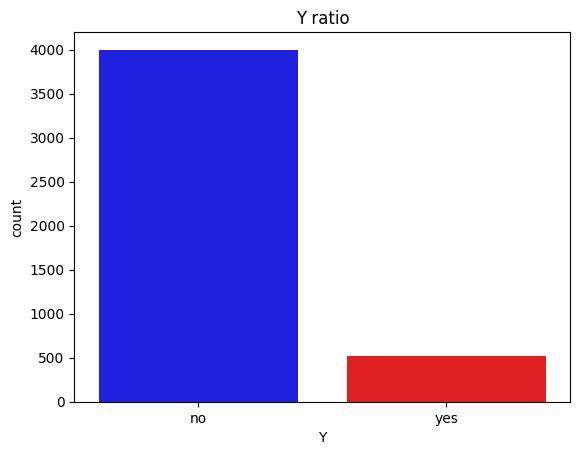

In [46]:
mpyp.title('Y ratio')
fig_cplot=sb.countplot(data=df, x='y', palette=['Blue', 'Red'])
mpyp.xlabel('Y')
mpyp.show(fig_cplot)

### Data Preperation

In [47]:
label=['job', 'marital', 'education', 'default', 'housing', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
le=LabelEncoder()
for i in label:
    df[i]=le.fit_transform(df[i])

In [48]:
X=df.drop(columns=['y'], axis=1)
y=df['y']

sampler=RandomOverSampler()
X, y=sampler.fit_resample(X, y)

ms=MinMaxScaler()
X=ms.fit_transform(X)

#splitting to test and train data
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [49]:
names_of_models=[
    'LogisticRegression',
    'RandomForestClassifier',
    'GaussianNB',
    'MultinomialNB',
    'XGBClassifier',
    'KNeighborsClassifier',
    'CatBoostClassifier',
    'DecisionTreeClassifier'
]
models={
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'XGBClassifier': XGBClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'CatBoostClassifier': CatBoostClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(criterion='entropy',random_state=2,max_depth=10)
}

In [50]:
accuracies=[]
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)

    AS=accuracy_score(y_test, y_pred)
    accuracies.append(AS)

    print(f'Results for {name}')
    print('Accuracy score:', AS)
    print()

Results for LogisticRegression
Accuracy score: 0.7866666666666666

Results for RandomForestClassifier
Accuracy score: 0.97125

Results for GaussianNB
Accuracy score: 0.75875

Results for MultinomialNB
Accuracy score: 0.6795833333333333

Results for XGBClassifier
Accuracy score: 0.9575

Results for KNeighborsClassifier
Accuracy score: 0.8716666666666667

Learning rate set to 0.021499
0:	learn: 0.6788983	total: 1.7ms	remaining: 1.7s
1:	learn: 0.6667825	total: 3.26ms	remaining: 1.63s
2:	learn: 0.6557360	total: 4.76ms	remaining: 1.58s
3:	learn: 0.6450410	total: 6.33ms	remaining: 1.58s
4:	learn: 0.6339689	total: 7.84ms	remaining: 1.56s
5:	learn: 0.6245362	total: 9.32ms	remaining: 1.54s
6:	learn: 0.6162146	total: 10.8ms	remaining: 1.53s
7:	learn: 0.6072605	total: 12.3ms	remaining: 1.52s
8:	learn: 0.5981582	total: 13.9ms	remaining: 1.52s
9:	learn: 0.5919626	total: 15ms	remaining: 1.49s
10:	learn: 0.5851100	total: 16.5ms	remaining: 1.48s
11:	learn: 0.5779476	total: 18.2ms	remaining: 1.5s
12:	l

In [51]:
data1 = pd.DataFrame({'Names': names_of_models, 'Accuracies': accuracies}).sort_values(by=['Accuracies'],
                                                                                      ascending=False)
data1.style.background_gradient(axis=0, cmap='Greens')

,Names,Accuracies
1,RandomForestClassifier,0.971250
4,XGBClassifier,0.957500
6,CatBoostClassifier,0.947500
7,DecisionTreeClassifier,0.888750
5,KNeighborsClassifier,0.871667
0,LogisticRegression,0.786667
2,GaussianNB,0.758750
3,MultinomialNB,0.679583
